# Emotion Dataset Analysis


In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from vocabulary import Vocabulary


In [2]:
df = pd.read_csv("data/combined_emotion.csv")

df.head()

,sentence,emotion
0,i just feel really helpless and heavy hearted,fear
1,ive enjoyed being able to slouch about relax a...,sad
2,i gave up my internship with the dmrg and am f...,fear
3,i dont know i feel so lost,sad
4,i am a kindergarten teacher and i am thoroughl...,fear


Let's check the shape of the dataset


In [3]:
df.shape

(422746, 2)

We have 422746 samples and 2 columns. Now let's check if there's missing data


In [4]:
df.isnull().sum()

sentence    0
emotion     0
dtype: int64

Let's check data distribution


In [5]:
df["emotion"].value_counts()

emotion
joy        143067
sad        121187
anger       59317
fear        49649
love        34554
suprise     14972
Name: count, dtype: int64

In [6]:
emotion_counts = df["emotion"].value_counts()

fig = px.bar(
    emotion_counts,
    x=emotion_counts.index,
    y=emotion_counts.values,
    color=emotion_counts.index,
    labels={"x": "Emotion", "y": "Count"},
    title="Distribution of Emotions",
)

fig.show()

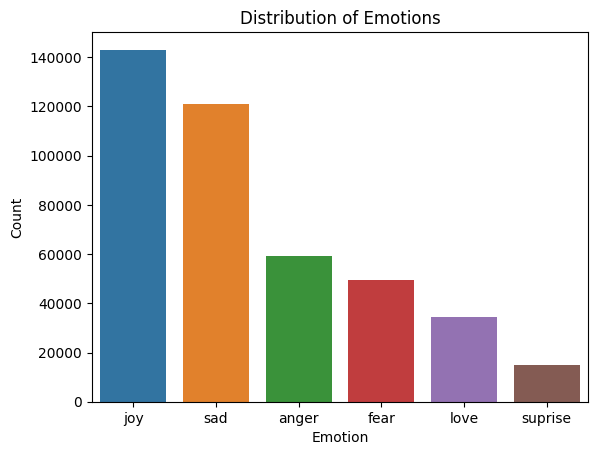

In [7]:
sns.barplot(
    x=emotion_counts.index,
    y=emotion_counts.values,
    hue=emotion_counts.index,
)

plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions')
plt.show()

Let's check average sentence lengths by emotion


In [8]:
df["Length"] = df["sentence"].apply(len)

avg_length_by_emotion = df.groupby("emotion")["Length"].mean().reset_index()

avg_length_by_emotion

,emotion,Length
0,anger,96.031290
1,fear,96.668473
2,joy,98.759204
3,love,104.689153
4,sad,93.127555
5,suprise,99.685079


In [9]:
fig = px.bar(
    avg_length_by_emotion,
    x="emotion",
    y="Length",
    color="emotion",
    labels={"x": "Emotion", "y": "Length"},
    title="Average sentence length by emotion",
)

fig.show()

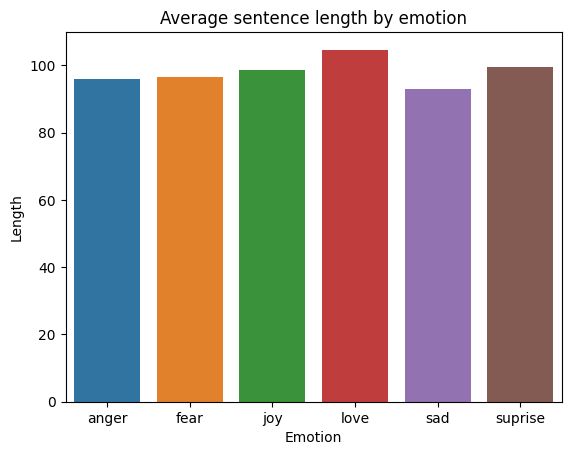

In [10]:
sns.barplot(avg_length_by_emotion,
    x="emotion",
    y="Length",
    hue='emotion')

plt.xlabel("Emotion")
plt.ylabel("Length")
plt.title("Average sentence length by emotion")
plt.show()

Check the vocabulary


In [11]:
unique_words = set(" ".join(df["sentence"]).lower().split())

vocab_size = len(unique_words)
print(f"Actual vocabulary size: {vocab_size}")

Actual vocabulary size: 75302


Let's create vocabluary and pickle it

In [12]:
df = pd.read_csv('data/combined_emotion.csv')

vocab = Vocabulary()
for sentence in df["sentence"]:
    vocab.add_sentence(sentence)
    
with open("vocab.pkl", "wb") as f:
    pickle.dump(vocab, f)